In [1]:
import os
import broad_qc as bq

# Constants
METRICS_DB = '/gale/netapp/seq11/illumina_runs/qc_metrics/broad_metrics.db'
METRICS_PATH = '/gale/netapp/seq11/illumina_runs/qc_metrics/'
FILE = 'LP-DHEVQR562496_Broad_QC__SALK068_SALK069__227K22LT4.csv'

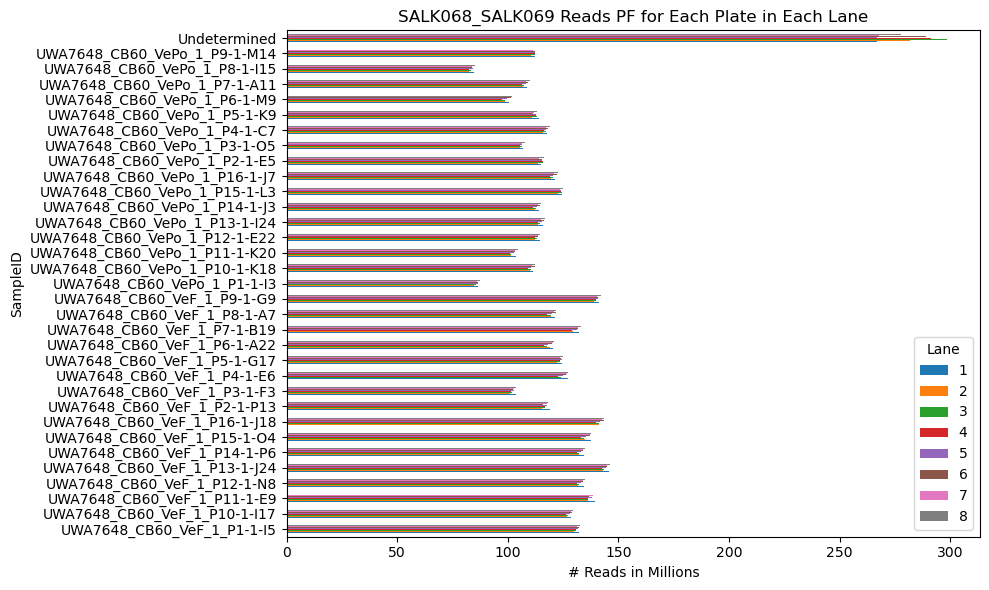

<Figure size 1000x600 with 0 Axes>

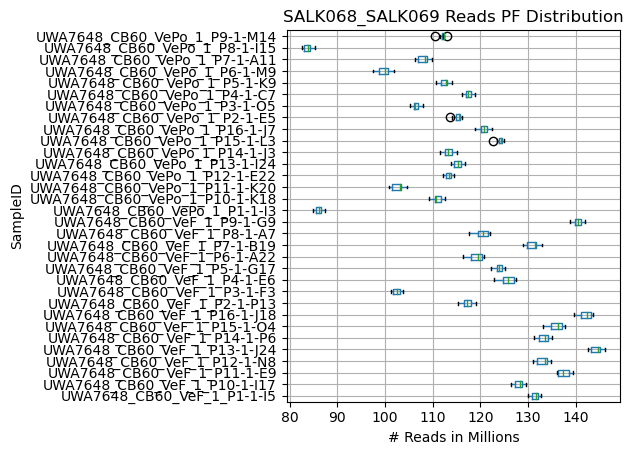

In [2]:
# Get pool strings and files
pool_string, pool_strings = bq.get_pool_strings(FILE)
pool_files = [os.path.join(METRICS_PATH, pool) for pool in pool_strings]

# Read dataframes
file_path = os.path.join(METRICS_PATH, FILE)
demux_stats, top_unknown_barcodes = bq.read_dataframes(file_path)

# Calculate and format metrics
unformatted_metrics = bq.calculate_metrics(demux_stats, top_unknown_barcodes)

formatted_metrics = bq.format_metrics(unformatted_metrics)

# Plot reads vs SampleID reversed
bq.plot_reads_vs_sampleID_reversed(demux_stats, METRICS_PATH, pool_string)


@card Broad sequencing QC metrics accepted
run_yield: 9,954,066,827,043 bases
run_yield_excluding_undetermined: 9,317,701,000,088 bases
total_reads: 32,705,543,352 Reads PF
total_reads_excluding_undetermined: 30,465,284,658 Reads PF
assumed_phiX_reads: 709,810,506 Reads PF
percent_phix_assumed: 2.17%
SALK068 fewest reads in a lane: UWA7648_CB60_VeF_1_P3-1-F3: 101,187,285
SALK069 fewest reads in a lane: UWA7648_CB60_VePo_1_P8-1-I15: 82,560,752
SALK068 Percentage of Run: 54.25%, 16,528,383,055 Reads PF
SALK069 Percentage of Run: 45.75%, 13,936,901,603 Reads PF


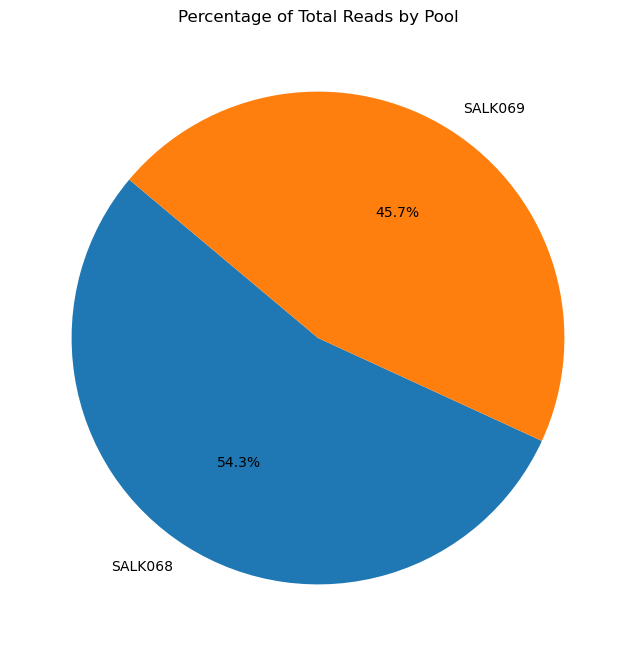

In [3]:
# Extract samples from files
pools = bq.extract_samples_from_files(demux_stats, pool_files)

# Initialize list for all formatted metrics
unformatted_metrics_list = []
formatted_metrics_list = []

for file_path, pool in pools.items():
    pool_metrics = bq.calculate_metrics(pool, top_unknown_barcodes)
    formatted_pool_metrics = bq.format_metrics(pool_metrics)
    unformatted_metrics_list.append(pool_metrics)
    formatted_metrics_list.append(formatted_pool_metrics)

print("@card Broad sequencing QC metrics accepted")
for key, value in formatted_metrics.items():
    if key != "plate_with_fewest_reads_in_a_lane":
        print(f"{key}: {value}")
        
# Print pool metrics 
for pool, metrics in zip(pool_strings, formatted_metrics_list):
    print(f"{pool} fewest reads in a lane: {metrics.get('plate_with_fewest_reads_in_a_lane')}")

# Initialize variables before the loop
pool_total_reads = []
total_reads_sum = 0

# Iterate through pool_strings and formatted_metrics_list simultaneously
for pool, metrics in zip(pool_strings, unformatted_metrics_list):
    # Extract numeric value from 'total_reads' in metrics
    total_reads = metrics.get('total_reads')
    # Append the total reads to pool_total_reads
    pool_total_reads.append(total_reads)
    
    # Add to the total sum of reads
    total_reads_sum += total_reads

import matplotlib.pyplot as plt

# Initialize lists for labels and percentages
labels = []
percentages = []

# Calculate percentages and gather labels and percentages
for pool, total_reads in zip(pool_strings, pool_total_reads):
    percentage = (total_reads / total_reads_sum) * 100
    labels.append(pool)
    percentages.append(percentage)
    print(f"{pool} Percentage of Run: {percentage:.2f}%, {total_reads:,} Reads PF")

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Reads by Pool')

# Save the plot
filename = "_".join(pool_strings) + "_percentage.png"
filepath = os.path.join(METRICS_PATH, filename)
plt.savefig(filepath)

In [4]:
# Write to database and print confirmation
bq.write_to_broad_metrics_db(pool_strings, unformatted_metrics_list, METRICS_DB)

# Query the database
bq.query_database(METRICS_DB)

The database, /gale/netapp/seq11/illumina_runs/qc_metrics/broad_metrics.db, has been updated.
('SALK070', 16957585053, 'UWA7648_CB67_CBLA_1_P8-1-G10', 112594400, None)
('SALK071', 13686038866, 'UWA7648_CB61626364_CbDN_1_P1-1-J12', 83879246, None)
('SALK068', 16528383055, 'UWA7648_CB60_VeF_1_P3-1-F3', 101187285, None)
('SALK069', 13936901603, 'UWA7648_CB60_VePo_1_P8-1-I15', 82560752, None)
('SALK066', 7469962158, 'UWA7648_BS02_MGM3_1_P13-1-G10', 28210466, None)
('SALK067', 21608610701, 'UWA7648_CB60_VeA_1_P6-1-G5', 100508068, None)
('SALK062', 13083327162, 'UWA7648_CX2324_SubTH_1_P8-1-I15', 81255556, None)
('SALK063', 17455127706, 'UWA7648_BS030405_PnTg_1_P15-1-H6', 114361371, None)
('SALK003', 12296137707, 'UWA7648_CX17_A38_1_P6-1-M9', 74821871, None)
('SALK074', 12343675054, 'UCI4723_CX01_A10_1_P10-1-J11', 86671613, None)
('SALK077', 17462604629, 'UCI4723_CX07_A46_1_P1-1-I3', 97869021, None)
('SALK072', 13541445795, 'UWA7648_CX20_BF_2_P12-1-F3', 82510981, None)
('SALK073', 14147790138